In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fantacher/neu-metal-surface-defects-data")

print("Path to dataset files:", path)

100%|██████████| 57.4M/57.4M [00:00<00:00, 157MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fantacher/neu-metal-surface-defects-data/versions/1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train_dir = "/content/drive/MyDrive/train"
test_dir = "/content/drive/MyDrive/test"
valid_dir = "/content/drive/MyDrive/valid"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [5]:
for image_batch , labels_batch in train_generator :
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32, 6)


In [6]:
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [7]:
#making functions
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

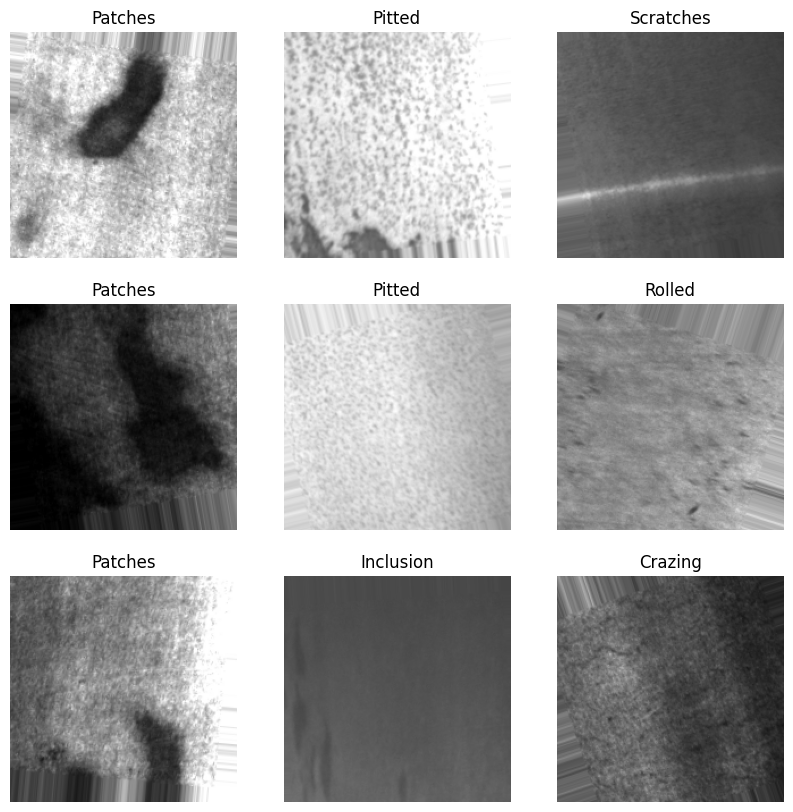

In [8]:
sample_images(train_generator, nrows=3, ncols=3)

In [9]:
image_batch

array([[[[0.7421357 , 0.7421357 , 0.7421357 ],
         [0.6678623 , 0.6678623 , 0.6678623 ],
         [0.6916707 , 0.6916707 , 0.6916707 ],
         ...,
         [0.30261084, 0.30261084, 0.30261084],
         [0.3030245 , 0.3030245 , 0.3030245 ],
         [0.30419648, 0.30419648, 0.30419648]],

        [[0.7623643 , 0.7623643 , 0.7623643 ],
         [0.68044823, 0.68044823, 0.68044823],
         [0.67300296, 0.67300296, 0.67300296],
         ...,
         [0.3055948 , 0.3055948 , 0.3055948 ],
         [0.30588236, 0.30588236, 0.30588236],
         [0.30588236, 0.30588236, 0.30588236]],

        [[0.7670524 , 0.7670524 , 0.7670524 ],
         [0.7085767 , 0.7085767 , 0.7085767 ],
         [0.6706589 , 0.6706589 , 0.6706589 ],
         ...,
         [0.30588236, 0.30588236, 0.30588236],
         [0.307998  , 0.307998  , 0.307998  ],
         [0.31151405, 0.31151405, 0.31151405]],

        ...,

        [[0.85732496, 0.85732496, 0.85732496],
         [0.8397447 , 0.8397447 , 0.8397447 ]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [11]:
model1 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model1.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 354s 7s/step - accuracy: 0.2155 - loss: 2.2163 - val_accuracy: 0.5556 - val_loss: 1.3007
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.6074 - loss: 1.1102 - val_accuracy: 0.5833 - val_loss: 0.9815
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.7521 - loss: 0.6951 - val_accuracy: 0.8750 - val_loss: 0.5169
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7496 - loss: 0.6525 - val_accuracy: 0.8889 - val_loss: 0.2611
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.8827 - loss: 0.3721 - val_accuracy: 0.8333 - val_loss: 0.4899
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8596 - loss: 0.3844 - val_accuracy: 0.9167 - val_loss: 0.2464
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9071 - loss: 0.2569 - val_accuracy: 0.9444 - val_loss: 0.1658
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8949 - loss: 0.2995 - val_accuracy: 0.8889 - v

In [15]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

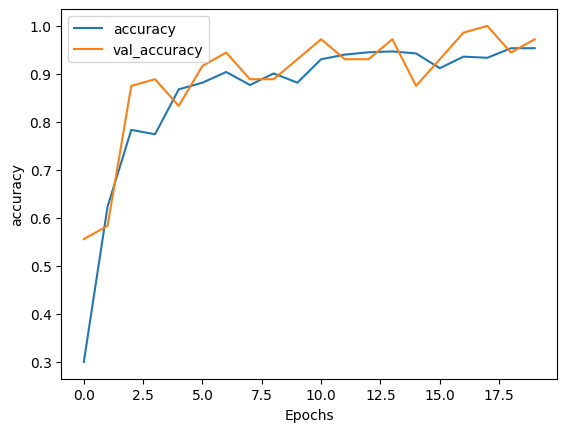

In [16]:
plot_history(history,"accuracy")

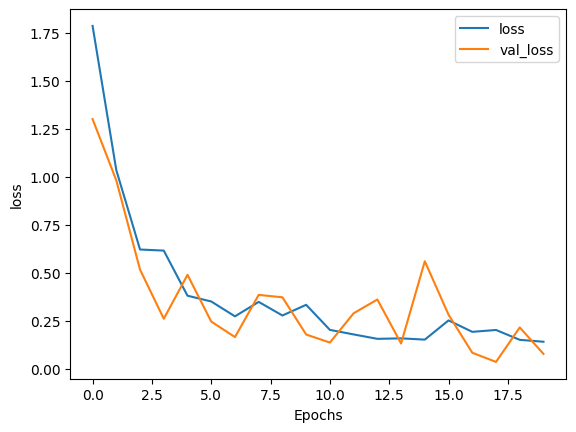

In [17]:
plot_history(history,"loss")

In [18]:
result = model1.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9379 - loss: 0.1787
Test loss, Test accuracy :  [0.19683608412742615, 0.9305555820465088]


In [19]:
base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top = False , weights = 'imagenet' ,
                                                               input_shape = (200,200,3), pooling= 'max')
model2 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy", "F1Score", "precision", "recall"])

In [23]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history2 = model2.fit(train_generator,
                    epochs=20,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - F1Score: 0.2091 - accuracy: 0.2314 - loss: 2.1316 - precision: 0.2402 - recall: 0.0384 - val_F1Score: 0.7242 - val_accuracy: 0.7222 - val_loss: 0.9208 - val_precision: 0.8750 - val_recall: 0.3889
Epoch 2/20
43/52 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - F1Score: 0.6280 - accuracy: 0.6298 - loss: 0.9309 - precision: 0.7172 - recall: 0.4085

KeyboardInterrupt: 

In [ ]:
def plot_history(history, metric):
    plt.plot(history2.history[metric])
    plt.plot(history2.history['val_'+metric], '')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [ ]:
plot_history(history2, 'accuracy')

In [ ]:
plot_history(history, 'loss')

In [ ]:
result = model2.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model1.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

In [ ]:
images, labels = next(test_generator)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model2.predict(images)


class_names=list(test_generator.class_indices.keys())


plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

In [ ]:
import pandas as pd

# Define the accuracy and loss values for both models
model1_accuracy = history.history['accuracy'][-1]
model1_loss = history.history['loss'][-1]
model2_accuracy = history2.history['accuracy'][-1]
model2_loss = history2.history['loss'][-1]


# Create a dictionary with the accuracy and loss values
data = {'Model': ['Model 1', 'Model 2'],
        'Accuracy': [model1_accuracy, model2_accuracy],
        'Loss': [model1_loss, model2_loss]}

df = pd.DataFrame(data)
df